In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# !pip install seaborn

In [18]:
# Load the dataset
df = pd.read_csv("netflix_watching_history_week1.csv")

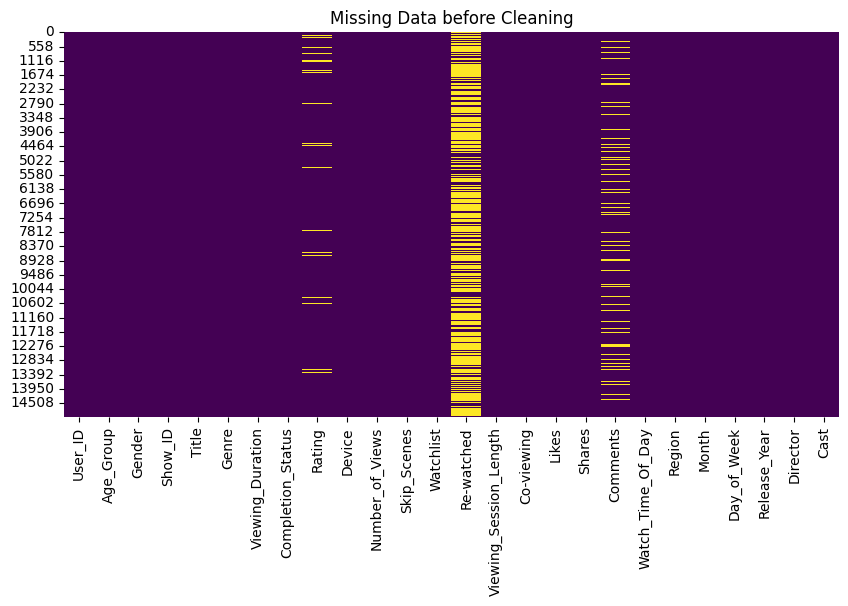

In [19]:
# Visualizing Missing Data After Cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data before Cleaning")
plt.show()

In [4]:
# Display basic information about the dataset
df.head()

,User_ID,Age_Group,Gender,Show_ID,Title,Genre,Viewing_Duration,Completion_Status,Rating,Device,...,Likes,Shares,Comments,Watch_Time_Of_Day,Region,Month,Day_of_Week,Release_Year,Director,Cast
0,1,18-24,Undisclosed,13,Show_13,Fantasy,41,Completed,2.0,TV,...,Yes,No,Yourself change fill red make none owner docto...,Evening,Africa,April,Sunday,2020,George Griffith,"Jeremy Green, Deborah Simmons, Ann Hawkins"
1,1,18-24,Undisclosed,20,Show_20,Action,55,Midway,1.0,Mobile,...,No,No,Too case alone. Off yet effort candidate popul...,Morning,Africa,August,Friday,2005,Stefanie Mejia,"Leonard Elliott, Christopher Harvey, Matthew D..."
2,1,18-24,Undisclosed,69,Show_69,Comedy,21,Completed,2.0,Mobile,...,Yes,No,Magazine national difficult behavior age. Fill...,Evening,Africa,February,Friday,2017,Joseph Wood,"Ronald Moore, Shawn Walls, Michael Chung, Case..."
3,1,18-24,Undisclosed,70,Show_70,Action,52,Completed,4.0,Mobile,...,No,No,Structure a huge. Half name beyond understand ...,Evening,Africa,April,Saturday,2023,Oscar Ponce,"Tim Montgomery, Trevor Romero, Sally Murphy"
4,1,18-24,Undisclosed,85,Show_85,Thriller,60,Completed,5.0,Tablet,...,Yes,Yes,Send seem member go whom another. Answer usual...,Night,Africa,November,Tuesday,2022,Erin Braun,"Stuart Stewart, Cristina Lawrence, John Walker..."


In [6]:
df.isnull().sum()

User_ID                      0
Age_Group                    0
Gender                       0
Show_ID                      0
Title                        0
Genre                        0
Viewing_Duration             0
Completion_Status            0
Rating                     753
Device                       0
Number_of_Views              0
Skip_Scenes                  0
Watchlist                    0
Re-watched                9036
Viewing_Session_Length       0
Co-viewing                   0
Likes                        0
Shares                       0
Comments                  2259
Watch_Time_Of_Day            0
Region                       0
Month                        0
Day_of_Week                  0
Release_Year                 0
Director                     0
Cast                         0
dtype: int64

In [16]:
df = df.copy()  # Ensure we are modifying the original DataFrame
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Re-watched'] = df['Re-watched'].fillna('No')
df['Comments'] = df['Comments'].fillna('No Comment')

C:\Users\mohit\AppData\Local\Temp\ipykernel_38716\1068754166.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
C:\Users\mohit\AppData\Local\Temp\ipykernel_38716\1068754166.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


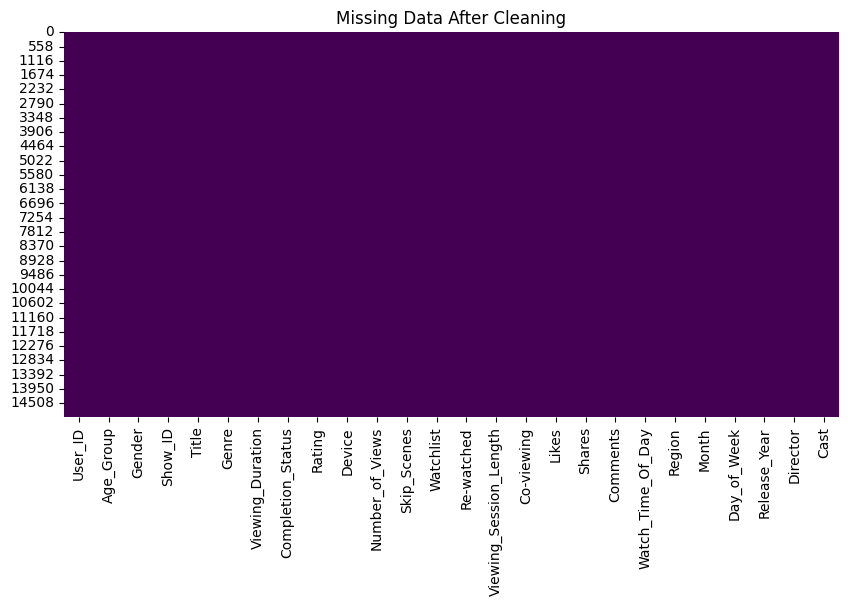

In [17]:
# Handling Missing Data

# Fill missing Ratings with the median rating
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Fill missing 'Re-watched' with 'No' (assuming missing means not rewatched)
df['Re-watched'].fillna('No', inplace=True)

# Fill missing Comments with 'No Comment' (assuming empty comments mean no comment left)
df['Comments'].fillna('No Comment', inplace=True)

# Visualizing Missing Data After Cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data After Cleaning")
plt.show()


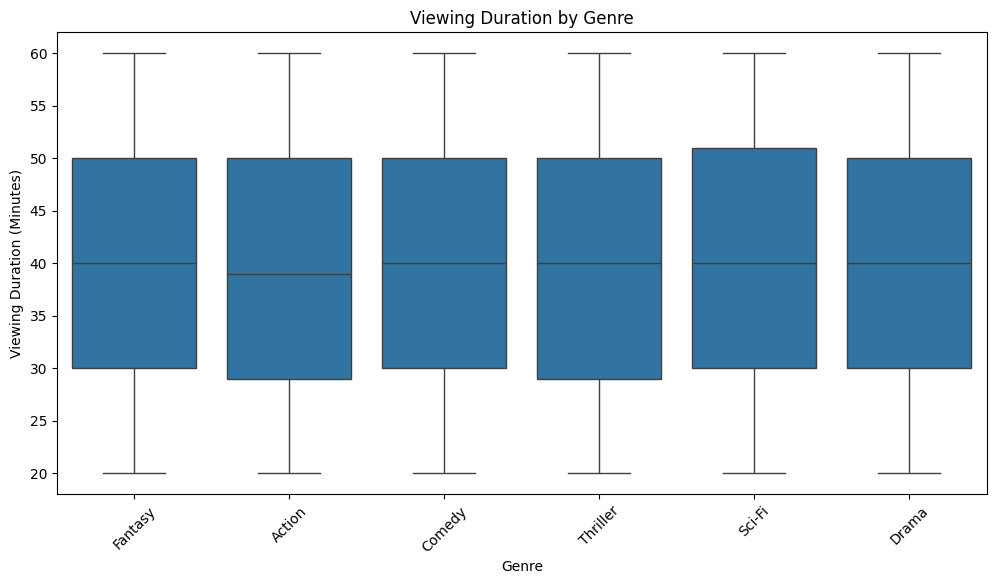

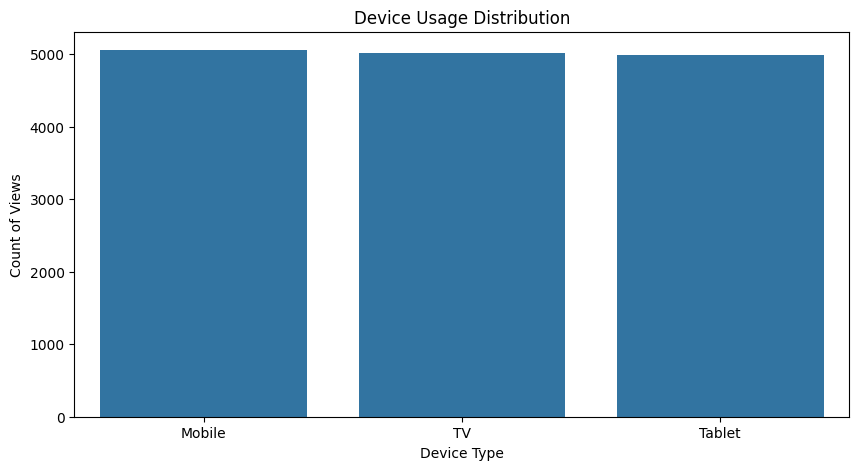

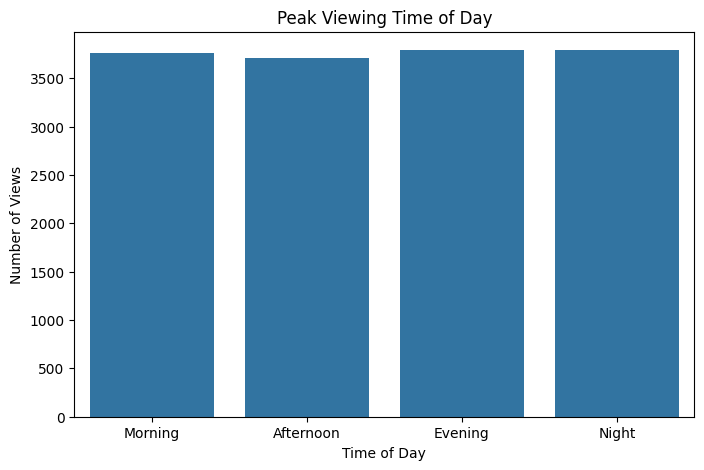

In [14]:
# Selecting three key metrics for analysis
# 1. Viewing Duration by Genre
# 2. Device Usage Trends
# 3. Peak Viewing Time of Day

# 1. Viewing Duration by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Viewing_Duration', data=df)
plt.xticks(rotation=45)
plt.title("Viewing Duration by Genre")
plt.xlabel("Genre")
plt.ylabel("Viewing Duration (Minutes)")
plt.show()

# 2. Device Usage Trends
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Device', order=df['Device'].value_counts().index)
plt.title("Device Usage Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count of Views")
plt.show()

# 3. Peak Viewing Time of Day
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Watch_Time_Of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Peak Viewing Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Views")
plt.show()


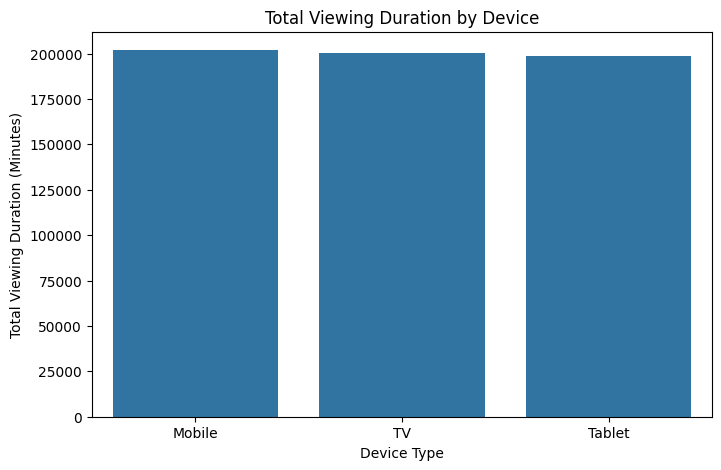

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by and calculate sums
device_usage = df.groupby('Device')['Viewing_Duration'].sum().reset_index()

# Plot updated visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=device_usage, x='Device', y='Viewing_Duration')
plt.title("Total Viewing Duration by Device")
plt.xlabel("Device Type")
plt.ylabel("Total Viewing Duration (Minutes)")
plt.show()


In [21]:
df['Device'].value_counts()
df['Watch_Time_Of_Day'].value_counts()
df['Genre'].value_counts()


Genre
Fantasy     3478
Sci-Fi      2993
Comedy      2434
Action      2198
Thriller    1987
Drama       1970
Name: count, dtype: int64

In [22]:
df['Device'].value_counts(normalize=True) * 100  # Convert to percentage


Device
Mobile    33.579017
TV        33.339973
Tablet    33.081009
Name: proportion, dtype: float64